In [12]:
for iteration in range(10):
    print(f"iteration-{iteration} begins:\n\n")
    X = gen_X(5, 500)
    y = X.apply(gen_y, axis = 1)
    y.name = 'y'
    df = pd.concat([X, y], axis = 1)
    clustering = anova_clustering(df.iloc[:, :-1], df.y)
    clustering.gen_importance_score(16, filename = f'clustering_test_result_iter_{iteration}_cluster_16.csv', max_variables = 7)


iteration-0 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-1 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-2 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-3 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-4 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-5 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-6 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-7 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-8 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


iteration-9 begins:




  0%|          | 0/971711 [00:00<?, ?it/s]


In [104]:
clustering = anova_clustering(df.iloc[:, :-1], df.y)

In [107]:
clustering.gen_importance_score(11, filename = 'testing_function.csv', max_variables = 7)

  0%|          | 0/971711 [00:00<?, ?it/s]

  3%|▎         | 29234/971711 [01:02<33:34, 467.90it/s]


KeyboardInterrupt: 

In [79]:
first_output = clustering.summary_table.copy()
first_output = first_output.drop('mse', axis = 1)
first_output['z'] = range(2**5)
first_output = first_output[['x1','x2','x3','x4','x5','z','group_means','count']]
first_output = first_output.rename(columns = {'x1': '$x_1$', 'x2': '$x_2$','x3': '$x_3$', 'x4': '$x_4$','x5': '$x_5$',
                                              'group_means': '$\hat{y}$',
                                              'count': '$n_z$',
                                              'z':'$z$'})

In [80]:
first_output.head()

,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$z$,$\hat{y}$,$n_z$
0,0,0,0,0,0,0,0.707991,20
1,0,0,0,0,1,1,1.891421,18
2,0,0,0,1,0,2,2.610576,12
3,0,0,0,1,1,3,4.703857,16
4,0,0,1,0,0,4,2.243036,12


In [81]:
tau_estimates = []
tau_estimates_lb = []
num_clusters = list(range(2, 2**5))
for k in num_clusters:
    tau_est = tau(df.shape[0], 2**5, k, clustering.estimator.score, clustering.metric_after_clustering(num_clusters = k))
    tau_estimates.append(tau_est.tau_est)
    tau_estimates_lb.append(tau_est.tau_LB)

In [82]:
tau_output = pd.DataFrame(zip(num_clusters, tau_estimates, tau_estimates_lb), columns = ['num_clusters','tau_estimates','tau_estimate_lower_bound'])

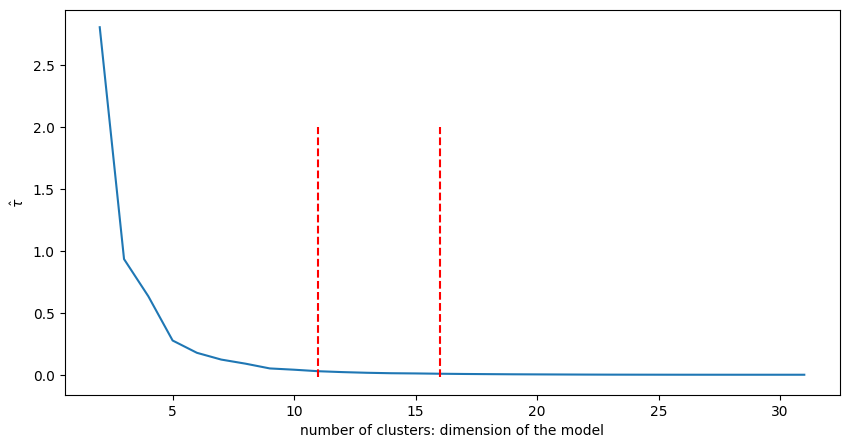

In [83]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize = (8.5, 6.5))
sns.lineplot(data = tau_output, x = 'num_clusters', y = 'tau_estimates')
ax.vlines(x = 11, ymin =-.02, ymax = 2, color = 'red', linestyles='--')
ax.vlines(x = 16, ymin =-.02, ymax = 2, color = 'red', linestyles='--')
ax.set_xlabel('number of clusters: dimension of the model')
ax.set_ylabel('$\\hat{\\tau}$')
plt.show()
fig.savefig('cluster_tau.png')

In [84]:
tau_output

,num_clusters,tau_estimates,tau_estimate_lower_bound
0,2,2.802735e+00,2.208295e+00
1,3,9.327179e-01,6.597220e-01
2,4,6.328104e-01,4.174031e-01
3,5,2.760621e-01,1.363398e-01
4,6,1.768760e-01,6.361288e-02
5,7,1.223507e-01,2.660619e-02
6,8,8.930284e-02,6.398680e-03
7,9,5.085708e-02,3.733394e-15
8,10,4.057688e-02,3.696872e-15
9,11,2.833698e-02,3.653387e-15


In [85]:
clustering.get_projected_beta_hat(16).round(3)

array([ 0.708,  1.129,  1.129,  1.707,  1.707,  1.129,  0.226,  0.504,
        0.504, -0.552, -0.351,  0.795,  0.226, -0.073, -0.351,  1.16 ,
        0.175,  0.087,  0.052,  2.123,  1.407,  0.5  ,  1.108,  0.142,
       -0.569,  1.391,  0.517, -1.599,  0.077, -1.997,  1.139,  2.239])

In [86]:
output = pd.DataFrame(zip(clustering.beta_names, clustering.get_projected_beta_hat(16).round(3)), columns = ['beta_name','coef_est'])

In [88]:
output.sort_values('coef_est')

,beta_name,coef_est
29,beta1*beta3*beta4*beta5,-1.997
27,beta1*beta2*beta3*beta5,-1.599
24,beta2*beta4*beta5,-0.569
9,beta1*beta5,-0.552
14,beta3*beta5,-0.351
10,beta2*beta3,-0.351
13,beta3*beta4,-0.073
18,beta1*beta2*beta5,0.052
28,beta1*beta2*beta4*beta5,0.077
17,beta1*beta2*beta4,0.087
